**<div style="border: 20px solid green; padding: 12px; font-size: 20px;">
## <span style='color:red;'>PROJET DE PYTHON POUR L'ANNÉE ACADÉMIQUE 2023-2024</span>
## <span style='color:red;'>NOM DES PARTICIPANTS</span> : AFADONOU KOKOUVI
## <span style='color:red;'>NOM DE L'ENSEIGNANT</span>: ALEXANDRE WAREMBOURG </div>


****
## ***<span style='color:green;'> Notre projet vise à analyser les tendances et les facteurs de risque associés aux accidents de la circulation lies aux vehicule de type 1 impliquant des piétons et des cyclistes dans les divers arrondissements. Ensuite, nous développerons un modèle permettant de prédire si le fait d'emprunter une rue à des heures spécifiques, un jour donné de la semaine et pendant un mois particulier accroît le risque d'accident </span>***.
****

#### Importation des packages nécessaires pour la manipulation des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer

## **I** **<span style='color:blue;'>**Importation des deux jeux de données qui feront l'objet de notre analyse**</span>**

In [2]:
collision_type = pd.read_csv(r"C:\Users\pc\Desktop\projet_python\collision_type.csv", sep ="|")
person_crash = pd.read_csv(r"C:\Users\pc\Desktop\projet_python\person_crash.csv", sep = "|")

C:\Users\pc\AppData\Local\Temp\ipykernel_13636\2489172070.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  person_crash = pd.read_csv(r"C:\Users\pc\Desktop\projet_python\person_crash.csv", sep = "|")


## Détail du nom des variables dans le jeu de donnée person_crash

1.  **crash_date** : La date à laquelle l'accident s'est produit.
2. **crash_time**: L'heure à laquelle l'accident s'est produit.
3. **on_street_name**: Le nom de la rue où l'accident s'est produit.
4. **off_street_name**: Le nom de la rue adjacente où l'accident s'est produit, s'il y en a une.
5. **number_of_persons_injured**: Le nombre total de personnes blessées dans l'accident.
6. **number_of_persons_killed**: Le nombre total de personnes tuées dans l'accident.
7. **number_of_pedestrians_injured**: Le nombre de piétons blessés dans l'accident.
8. **number_of_pedestrians_killed**: Le nombre de piétons tués dans l'accident.
9. **number_of_cyclist_injured**: Le nombre de cyclistes blessés dans l'accident.
10. **number_of_cyclist_killed**: Le nombre de cyclistes tués dans l'accident.
11. **number_of_motorist_injured**: Le nombre de conducteurs blessés dans l'accident.
12. **number_of_motorist_killed**: Le nombre de conducteurs tués dans l'accident.
13. **collision_id**: L'identifiant unique de la collision.
14. **borough**: Le quartier de la ville où l'accident s'est produit.
15. **zip_code**: Le code postal de la zone où l'accident s'est produit.
16. **latitude**: La latitude de l'emplacement de l'accident.
17. **longitude**: La longitude de l'emplacement de l'accident.
18. **location**: La localisation précise de l'accident.
19. **cross_street_name**: Le nom de la rue transversale où l'accident s'est produit.

## Détail du nom des variables dans le jeu de données collision_type

1. **crash_date** : La date à laquelle l'accident s'est produit.
2. **crash_time** : L'heure à laquelle l'accident s'est produit.
3. **collision_id** : L'identifiant unique de la collision.
4. **vehicle_type_code1** : Le code du type de véhicule impliqué dans l'accident (premier véhicule).
5. **vehicle_type_code2** : Le code du type de véhicule impliqué dans l'accident (deuxième véhicule).
6. **vehicle_type_code_3** : Le code du type de véhicule impliqué dans l'accident (troisième véhicule, le cas échéant).
7. **vehicle_type_code_4** : Le code du type de véhicule impliqué dans l'accident (quatrième véhicule, le cas échéant).
8. **vehicle_type_code_5** : Le code du type de véhicule impliqué dans l'accident (cinquième véhicule, le cas échéant).
9. **contributing_factor_vehicle_1** : Le facteur contributif principal à l'accident pour le premier véhicule impliqué.
10. **contributing_factor_vehicle_2** : Le facteur contributif principal à l'accident pour le deuxième véhicule impliqué.
11. **contributing_factor_vehicle_3** : Le facteur contributif principal à l'accident pour le troisième véhicule impliqué.
12. **contributing_factor_vehicle_4** : Le facteur contributif principal à l'accident pour le quatrième véhicule impliqué.
13. **contributing_factor_vehicle_5** : Le facteur contributif principal à l'accident pour le cinquième véhicule impliqué.

## **I-1.** **Inspection des deux jeux de données**

In [3]:
collision_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 14 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   Unnamed: 0                     int64 
 1   crash_date                     object
 2   crash_time                     object
 3   collision_id                   int64 
 4   vehicle_type_code1             object
 5   vehicle_type_code2             object
 6   vehicle_type_code_3            object
 7   vehicle_type_code_4            object
 8   vehicle_type_code_5            object
 9   contributing_factor_vehicle_1  object
 10  contributing_factor_vehicle_2  object
 11  contributing_factor_vehicle_3  object
 12  contributing_factor_vehicle_4  object
 13  contributing_factor_vehicle_5  object
dtypes: int64(2), object(12)
memory usage: 213.6+ MB


##### Dans notre ensemble de données sur les types de collisions, une enquête a été menée auprès de 2 000 000 d'individus, avec 14 variables comprenant 2 variables quantitatives et 12 variables qualitatives. Ce jeu de données occupe une mémoire de 213,6 mégabits.

In [4]:
person_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   crash_date                     object 
 2   crash_time                     object 
 3   on_street_name                 object 
 4   off_street_name                object 
 5   number_of_persons_injured      float64
 6   number_of_persons_killed       float64
 7   number_of_pedestrians_injured  int64  
 8   number_of_pedestrians_killed   int64  
 9   number_of_cyclist_injured      int64  
 10  number_of_cyclist_killed       int64  
 11  number_of_motorist_injured     int64  
 12  number_of_motorist_killed      int64  
 13  collision_id                   int64  
 14  borough                        object 
 15  zip_code                       object 
 16  latitude                       float64
 17  longitude                      float64
 18  lo

##### Dans notre jeu de données portant sur les personnes accidentées, une enquête a été menée auprès de 2 000 000 d'individus, comprenant 20 variables dont 12 sont des variables quantitatives et 8 sont des variables qualitatives. Ce jeu de données occupe une mémoire de 305,2 mégaoctets.

### **I-2**  **Visualisation des valeurs manquantes et voir s'il y a des possibilités de les traiter avec les différentes méthodes vues aux cours**

In [5]:
person_crash.isnull().sum()/(len(person_crash))*100

Unnamed: 0                        0.00000
crash_date                        0.00000
crash_time                        0.00000
on_street_name                   20.97965
off_street_name                  37.28745
number_of_persons_injured         0.00090
number_of_persons_killed          0.00155
number_of_pedestrians_injured     0.00000
number_of_pedestrians_killed      0.00000
number_of_cyclist_injured         0.00000
number_of_cyclist_killed          0.00000
number_of_motorist_injured        0.00000
number_of_motorist_killed         0.00000
collision_id                      0.00000
borough                          31.09410
zip_code                         31.10600
latitude                         11.41525
longitude                        11.41525
location                         11.41525
cross_street_name                83.63900
dtype: float64

In [6]:
# Visualiser les valeurs manquantes  pour la base collision_type
collision_type.isnull().sum()/(len(collision_type))*100

Unnamed: 0                        0.00000
crash_date                        0.00000
crash_time                        0.00000
collision_id                      0.00000
vehicle_type_code1                0.62245
vehicle_type_code2               18.55585
vehicle_type_code_3              93.17940
vehicle_type_code_4              98.47195
vehicle_type_code_5              99.58695
contributing_factor_vehicle_1     0.31305
contributing_factor_vehicle_2    15.19765
contributing_factor_vehicle_3    92.93620
contributing_factor_vehicle_4    98.41985
contributing_factor_vehicle_5    99.57450
dtype: float64

## **I-3**. **Sélection des variables pour faire notre analyse; dans le jeu de données collision_type, nous allons éliminer la colonne des vehicules 3; 4 et 5 car elles presentent plus de 80% des valeurs manquantes**

In [3]:
# Séléction des variables dans le jeu de donnée "collision_type"
collision_type = collision_type[["crash_date","crash_time","collision_id","vehicle_type_code1","contributing_factor_vehicle_1"]]
# Convertission de la colonne "carsh_date" en type de données datetime
collision_type["crash_date"] = pd.to_datetime(collision_type["crash_date"])

# Ensuite, extrayez la date en tant que chaîne de caractères
#collision_type["crash_date"] = collision_type["crash_date"].dt.date.astype(str)
collision_type.head()

,crash_date,crash_time,collision_id,vehicle_type_code1,contributing_factor_vehicle_1
0,2021-09-11,2:39,4455765,Sedan,Aggressive Driving/Road Rage
1,2022-03-26,11:45,4513547,Sedan,Pavement Slippery
2,2022-06-29,6:55,4541903,Sedan,Following Too Closely
3,2021-09-11,9:35,4456314,Sedan,Unspecified
4,2021-12-14,8:13,4486609,NaN,NaN


In [4]:
# Séléction des variables dans le jeu de donnée "person_crash"
person_crash = person_crash[["crash_date","collision_id","crash_time","on_street_name","number_of_persons_injured","number_of_persons_killed",
"number_of_pedestrians_injured","number_of_pedestrians_killed","number_of_cyclist_injured","number_of_cyclist_killed","number_of_motorist_injured",
"number_of_motorist_killed","borough","latitude","longitude","location"]] 


In [5]:
# Convertissons de la colonne "carsh_date" en type de données datetime
person_crash["crash_date"] = pd.to_datetime(person_crash["crash_date"])

# Ensuite, extrayez la date en tant que chaîne de caractères
#person_crash["crash_date"] = person_crash["crash_date"].dt.date.astype(str)
person_crash.head()

,crash_date,collision_id,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,borough,latitude,longitude,location
0,2021-09-11,4455765,2:39,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,0,NaN,NaN,NaN,NaN
1,2022-03-26,4513547,11:45,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,0,NaN,NaN,NaN,NaN
2,2022-06-29,4541903,6:55,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,2021-09-11,4456314,9:35,NaN,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.667202,-73.866500,"{'latitude': '40.667202', 'longitude': '-73.86..."
4,2021-12-14,4486609,8:13,SARATOGA AVENUE,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91..."


## **I-4**. **Traitement des données manquantes dans le jeu de données "collision_type"**

En examinant la valeur des données manquantes dans l'ensemble de données "collision_type", nous sommes en mesure de remédier aux lacunes observées dans les colonnes "vehicle_type_code1", "contributing_factor_vehicle_1",'vehicle_type_code2',
'contributing_factor_vehicle_2'en appliquant la méthode de propagation de la dernière valeur observée. Cette décision repose sur l'hypothèse selon laquelle, en cas d'accident à un moment donné et en un endroit spécifique, la probabilité que celui-ci se produise à ce même moment est significative.

In [6]:
# Imputation des valeurs manquantes pour vehicle_type_code1 et contributing_factor_vehicle_1 par une valeur la plus proche
collision_type['vehicle_type_code1'].fillna(method='ffill', inplace=True)
collision_type['contributing_factor_vehicle_1'].fillna(method='ffill', inplace=True)


# Vérification des valeurs manquantes après l'imputation
print(collision_type.isnull().sum())


C:\Users\pc\AppData\Local\Temp\ipykernel_13636\1647310346.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  collision_type['vehicle_type_code1'].fillna(method='ffill', inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_13636\1647310346.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  collision_type['contributing_factor_vehicle_1'].fillna(method='ffill', inplace=True)


crash_date                       0
crash_time                       0
collision_id                     0
vehicle_type_code1               0
contributing_factor_vehicle_1    0
dtype: int64


#### **I-4-1**. **Dans l'ensemble du jeu de données "person_crash", nous envisageons appliquer la méthode d'imputation des valeurs manquantes par la methode forward fill pour les valeurs numeriques et par inconnu les valeurs categorielles**

In [7]:
from sklearn.impute import SimpleImputer

# Imputation pour les variables numériques (par la methode ffill)
numeric_columns = ['number_of_persons_injured', 'number_of_persons_killed', 'latitude', 'longitude']

person_crash[numeric_columns] = person_crash[numeric_columns].fillna(method='ffill')

print(person_crash.isnull().sum())


C:\Users\pc\AppData\Local\Temp\ipykernel_13636\3531823866.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  person_crash[numeric_columns] = person_crash[numeric_columns].fillna(method='ffill')


crash_date                            0
collision_id                          0
crash_time                            0
on_street_name                   419593
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
borough                          621882
latitude                              3
longitude                             3
location                         228305
dtype: int64


In [8]:

# Remplacement des valeurs manquantes par 'Unknown' pour les variables catégorielles
categorical_columns = ['borough', 'on_street_name', 'location']
person_crash[categorical_columns] = person_crash[categorical_columns].fillna('Unknown')

# Vérification des valeurs manquantes après l'imputation
print("\nValeurs manquantes après imputation :")
print(person_crash.isnull().sum())


Valeurs manquantes après imputation :
crash_date                       0
collision_id                     0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         3
longitude                        3
location                         0
dtype: int64


##  **I-4-2**. **Nous allons supprimer les NAS dans les colonnes Latitude et longitude car leurs pourcentage restent insignifiant dans notre jeu de donnee**

In [9]:
person_crash.dropna(subset=['longitude', 'latitude'], inplace=True)

In [10]:
person_crash.isnull().sum()

crash_date                       0
collision_id                     0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         0
longitude                        0
location                         0
dtype: int64

## **I-5**. **Fusion des deux bases de données et qui sera nommée accident_data**

In [11]:
# Fusionner les DataFrames sur les colonnes crash_date et crash_time
accident_data = pd.merge(person_crash, collision_type, on=['crash_date', 'crash_time','collision_id'])

# Vérification des valeurs manquantes après la fusion
print("\nValeurs manquantes après fusion :")
print(accident_data.isnull().sum())



Valeurs manquantes après fusion :
crash_date                       0
collision_id                     0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         0
longitude                        0
location                         0
vehicle_type_code1               0
contributing_factor_vehicle_1    0
dtype: int64


## Afficher les premières lignes du dataframe

In [12]:
accident_data.head(5)

,crash_date,collision_id,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,borough,latitude,longitude,location,vehicle_type_code1,contributing_factor_vehicle_1
0,2021-09-11,4456314,9:35,Unknown,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.667202,-73.866500,"{'latitude': '40.667202', 'longitude': '-73.86...",Sedan,Unspecified
1,2021-12-14,4486609,8:13,SARATOGA AVENUE,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91...",Sedan,Unspecified
2,2021-04-14,4407458,12:47,MAJOR DEEGAN EXPRESSWAY RAMP,0.0,0.0,0,0,0,0,0,0,Unknown,40.683304,-73.917274,Unknown,Dump,Unspecified
3,2021-12-14,4486555,17:05,BROOKLYN QUEENS EXPRESSWAY,0.0,0.0,0,0,0,0,0,0,Unknown,40.709183,-73.956825,"{'latitude': '40.709183', 'longitude': '-73.95...",Sedan,Passing Too Closely
4,2021-12-14,4486660,8:17,Unknown,2.0,0.0,0,0,0,0,2,0,BRONX,40.868160,-73.831480,"{'latitude': '40.86816', 'longitude': '-73.831...",Sedan,Unspecified


## Informations sur les données

In [17]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999997 entries, 0 to 1999996
Data columns (total 18 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   crash_date                     datetime64[ns]
 1   collision_id                   int64         
 2   crash_time                     object        
 3   on_street_name                 object        
 4   number_of_persons_injured      float64       
 5   number_of_persons_killed       float64       
 6   number_of_pedestrians_injured  int64         
 7   number_of_pedestrians_killed   int64         
 8   number_of_cyclist_injured      int64         
 9   number_of_cyclist_killed       int64         
 10  number_of_motorist_injured     int64         
 11  number_of_motorist_killed      int64         
 12  borough                        object        
 13  latitude                       float64       
 14  longitude                      float64       
 15  location       

Cette base de données contient des informations importantes pour comprendre les accidents de la circulation. Les variables telles que la date et l'heure de l'accident, les types de véhicules impliqués, les facteurs contributifs, le lieu de l'accident, le nombre de victimes, l'arrondissement et les coordonnées géographiques offrent une vue complète de chaque incident. En tant que data scientist, l'analyse de ces données nous permettrait d'identifier les tendances temporelles et spatiales des accidents, d'identifier les facteurs de risque les plus préoccupants, et de proposer des interventions ciblées pour améliorer la sécurité routière

In [13]:
accident_data.duplicated().sum()

0

## Nous n'avons pas de doublons dans notre base de donnee

#  **II**  **<span style='color:blue;'> LA STATISTIQUE DESCRIPTIVE </span>** (**<span style='color:blue;'> ANALYSE UNIVARIEE </span>**)

In [14]:
# Sélectionner les variables qualitatives
qualitative_variables = accident_data.select_dtypes(include='object')

# Afficher les statistiques descriptives
qualitative_variables.describe()

,crash_time,on_street_name,borough,location,vehicle_type_code1,contributing_factor_vehicle_1
count,1999997,1999997,1999997,1999997,1999997,1999997
unique,1440,17855,6,312342,1525,61
top,16:00,Unknown,Unknown,Unknown,Sedan,Unspecified
freq,27753,419593,621879,228302,547215,690407


Dans notre analyse des données sur les accidents, nous avons examiné plusieurs aspects pour mieux comprendre les schémas et les tendances. Voici ce que nous avons découvert :

L'heure à laquelle les accidents se produisent varie tout au long de la journée, avec des enregistrements pour chaque minute sur une période de 24 heures.

Nous avons répertorié un total de 17 855 rues différentes mentionnées dans nos données. Cependant, le terme "Unknown" apparaît le plus souvent, ce qui suggère qu'un nombre significatif d'accidents se produisent dans des endroits non spécifiés.

Concernant les arrondissements où les accidents se produisent, nous avons identifié 6 arrondissements différents dans nos données.

Nous avons également répertorié 1 525 types de véhicules différents impliqués dans les accidents. Le type de véhicule le plus courant est la "Sedan", présente dans 547 215 accidents. Cela pourrait refléter la popularité de ce type de véhicule ou son utilisation généralisée dans la région.

En ce qui concerne les facteurs contributifs aux accidents, nous avons identifié 61 facteurs différents. Le facteur le plus fréquent est "Unspecified", présent dans 690 407 enregistrements. Cela souligne l'importance de comprendre les circonstances exactes des accidents pour prévenir les futurs incidents.

## ***Statistiques descriptives pour les variables quantitatives (numériques)*** 

In [15]:
# Sélectionner les variables quantitatives
quantitative_variables = accident_data.select_dtypes(include=['int64', 'float64'])

# Afficher les statistiques descriptives
quantitative_variables.describe()

,collision_id,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,latitude,longitude
count,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06
mean,3.102944e+06,3.004425e-01,1.433002e-03,5.497208e-02,7.175011e-04,2.593104e-02,1.090002e-04,2.165758e-01,5.880009e-04,4.062960e+01,-7.375552e+01
std,1.504151e+06,6.912434e-01,3.987417e-02,2.408738e-01,2.727612e-02,1.608684e-01,1.048753e-02,6.523614e-01,2.641317e-02,1.962136e+00,3.692632e+00
min,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.013600e+02
25%,3.136119e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.066803e+01,-7.397514e+01
50%,3.636220e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.072131e+01,-7.392762e+01
75%,4.136472e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.076932e+01,-7.386669e+01
max,4.700832e+06,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.334444e+01,0.000000e+00


En moyenne, chaque accident entraîne des blessures pour environ un tiers d'une personne, ce qui équivaut à environ une blessure pour chaque troisième accident.
Le nombre de décès est extrêmement faible, avec environ une personne tuée pour chaque 700 accidents, soit environ une personne sur mille.
Environ 5 piétons sont blessés pour chaque 100 accidents, tandis qu'un piéton est tué pour chaque 1 400 accidents.
Les accidents impliquant des cyclistes sont moins fréquents, avec environ un cycliste blessé pour chaque 30 accidents, et un cycliste tué pour chaque 10 000 accidents.
Les automobilistes représentent la grande majorité des blessés, avec environ 2 personnes blessées pour chaque accident, et environ une personne tuée pour chaque 1 500 accidents.

##  ***Nombre de piétons et de cyclistes impliqués dans les accidents***

In [16]:
# Nombre de piétons impliqués
pietons_impliques = accident_data['number_of_pedestrians_injured'] + accident_data['number_of_pedestrians_killed']
# Nombre total de piétons impliqués dans les accidents
total_pietons = pietons_impliques.sum()

# Nombre de cyclistes impliqués
cyclistes_impliques = accident_data['number_of_cyclist_injured'] + accident_data['number_of_cyclist_killed']
# Nombre total de cyclistes impliqués dans les accidents
total_cyclistes = cyclistes_impliques.sum()

# Nombre de motocyclistes impliqués
motoristes_impliques = accident_data['number_of_motorist_injured'] + accident_data['number_of_motorist_killed']
# Nombre total de motoristes impliqués dans les accidents
total_motoristes = motoristes_impliques.sum()

print("Nombre total de piétons impliqués dans les accidents : ", total_pietons)
print("Nombre total de cyclistes impliqués dans les accidents : ", total_cyclistes)
print("Nombre total de motoristes impliqués dans les accidents : ", total_motoristes)

Nombre total de piétons impliqués dans les accidents :  111379
Nombre total de cyclistes impliqués dans les accidents :  52080
Nombre total de motoristes impliqués dans les accidents :  434327


Sur l'ensemble des accidents enregistrés, environ 111 379 impliquent des piétons représentant environ 5,57% de tous les accidents. Cela représente un nombre significatif de situations où des personnes se déplaçant à pied ont été impliquées dans des accidents routiers.

Les cyclistes sont également touchés, avec environ 52 080 accidents impliquant des personnes à vélo représentant environ 2,60% de tous les accidents. Bien que ce nombre soit inférieur à celui des piétons, il reste important et met en évidence les risques auxquels sont exposés les cyclistes sur nos routes.

En comparaison, les automobilistes représentent la grande majorité des personnes impliquées dans les accidents, avec environ 434 327 cas recensés représentant environ 21,72% de tous les accidents. Cela souligne l'impact prépondérant des véhicules motorisés dans les incidents routiers.

## ***Facteurs contributifs aux accidents*** 

In [17]:
# Données à afficher
facteurs_count = accident_data['contributing_factor_vehicle_1'].value_counts().head(10)

# Créer un DataFrame à partir des valeurs comptées
facteurs_df = pd.DataFrame({'Facteur Contributif': facteurs_count.index, 'Occurrences': facteurs_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
facteurs_df = facteurs_df.sort_values(by='Occurrences', ascending=False)

# Afficher les facteurs contributifs les plus fréquents avec des barres distinctes pour chaque facteur
facteurs_df_styled = facteurs_df.style.bar(subset=['Occurrences'], color='#5fba7d', align='mid')

# Afficher le tableau stylisé
facteurs_df_styled

,Facteur Contributif,Occurrences
0,Unspecified,690407
1,Driver Inattention/Distraction,398010
2,Failure to Yield Right-of-Way,118424
3,Following Too Closely,106661
4,Backing Unsafely,74673
5,Other Vehicular,62338
6,Passing or Lane Usage Improper,54816
7,Turning Improperly,49655
8,Passing Too Closely,49384
9,Fatigued/Drowsy,47442


Parmi les raisons les plus fréquentes des accidents de la route, nous constatons que :

"Unspecified" est le facteur le plus souvent mentionné, ce qui signifie que dans un grand nombre de cas, la cause exacte de l'accident n'est pas précisée. Cela souligne peut-être un besoin d'amélioration dans la collecte et la documentation des informations sur les accidents.

"Driver Inattention/Distraction" est également une cause fréquente, ce qui met en lumière l'importance de rester attentif et concentré lors de la conduite.

"Failure to Yield Right-of-Way" est une autre cause significative, soulignant l'importance du respect des règles de priorité sur la route.

D'autres facteurs couramment impliqués dans les accidents incluent le suivi trop serré, les manœuvres de recul non sécurisées et des comportements inappropriés tels que le dépassement ou l'utilisation incorrecte des voies.

Des facteurs tels que la fatigue ou la somnolence au volant sont également des préoccupations, soulignant l'importance de prendre des pauses régulières et de se reposer suffisamment avant de prendre le volant.

## ***Le nom des rues qui ont enregistre plus d'accident***

In [18]:
# Données à afficher
facteurs_count = accident_data['on_street_name'].value_counts().head(10)

# Créer un DataFrame à partir des valeurs comptées
facteurs_df = pd.DataFrame({'on_street_name': facteurs_count.index, 'Occurrences': facteurs_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
facteurs_df = facteurs_df.sort_values(by='Occurrences', ascending=False)

# Afficher le nom des rues les plus fréquents avec des barres distinctes pour chaque rue
facteurs_df_styled = facteurs_df.style.bar(subset=['Occurrences'], color='#5fba7d', align='mid')

# Afficher le tableau stylisé
facteurs_df_styled

,on_street_name,Occurrences
0,Unknown,419593
1,BROADWAY,17277
2,ATLANTIC AVENUE,15322
3,BELT PARKWAY,13543
4,3 AVENUE,12476
5,NORTHERN BOULEVARD,11965
6,LONG ISLAND EXPRESSWAY,9928
7,BROOKLYN QUEENS EXPRESSWAY,9743
8,FLATBUSH AVENUE,9741
9,LINDEN BOULEVARD,9587


"Unknown" est le nom de rue le plus souvent mentionné dans nos données, avec 419 593 occurrences. Cela signifie qu'un nombre significatif d'accidents ont lieu dans des zones où la rue spécifique n'est pas identifiée, ce qui peut indiquer un manque de précision dans la documentation des lieux d'accidents.

Parmi les noms de rue répertoriés, "BROADWAY" arrive en deuxième position avec 17 277 occurrences, suivi de "ATLANTIC AVENUE" avec 15 322 occurrences. Ces rues sont fréquemment associées à des accidents, ce qui peut refléter leur emplacement densément peuplé ou leur caractère central dans la circulation urbaine.

D'autres rues fréquemment mentionnées incluent "BELT PARKWAY" (13 543 occurrences), "3 AVENUE" (12 476 occurrences) et "NORTHERN BOULEVARD" (11 965 occurrences), suggérant des zones où les accidents sont plus courants et où une attention particulière à la sécurité routière peut être nécessaire.

Des artères importantes telles que "LONG ISLAND EXPRESSWAY" (9 928 occurrences) et "BROOKLYN QUEENS EXPRESSWAY" (9 743 occurrences) figurent également parmi les rues les plus mentionnées, soulignant l'importance de la sécurité sur les autoroutes et les voies rapides.

"FLATBUSH AVENUE" (9 741 occurrences) et "LINDEN BOULEVARD" (9 587 occurrences) sont également des rues fréquemment associées aux accidents, ce qui indique des zones où des mesures supplémentaires pourraient être nécessaires pour améliorer la sécurité routière.

## ***Arrondissement de l'accident*** 

In [19]:
# Compter les occurrences de chaque arrondissement
arrondissements_count = accident_data['borough'].value_counts()

# Créer un DataFrame à partir des valeurs comptées
arrondissements_df = pd.DataFrame({'Arrondissement': arrondissements_count.index, 'Occurrences': arrondissements_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
arrondissements_df = arrondissements_df.sort_values(by='Occurrences', ascending=False)

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(arrondissements_df) // 2 + 1)

# Afficher les occurrences de chaque arrondissement avec des styles séparés pour chaque ligne
arrondissements_df_styled = arrondissements_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=arrondissements_df['Occurrences'].max())

# Afficher le tableau stylisé
arrondissements_df_styled


,Arrondissement,Occurrences
0,Unknown,621879
1,BROOKLYN,436740
2,QUEENS,369237
3,MANHATTAN,311127
4,BRONX,203187
5,STATEN ISLAND,57827


La catégorie "Unknown" est la plus courante parmi nos données, avec 621 879 occurrences. Cela indique qu'un nombre important d'accidents ont lieu dans des zones où l'arrondissement spécifique n'est pas identifié, ce qui peut suggérer un manque de précision dans la documentation des lieux d'accidents.

Parmi les arrondissements répertoriés, Brooklyn arrive en tête avec 436 740 occurrences, suivi de Queens avec 369 237 occurrences. Ces arrondissements sont souvent densément peuplés et comportent de nombreux axes de circulation, ce qui peut expliquer le nombre élevé d'accidents signalés.

Manhattan est également significatif, avec 311 127 occurrences, ce qui reflète probablement le caractère central et densément urbanisé de cet arrondissement, où la circulation est intense et les risques d'accidents plus élevés.

Le Bronx est également mentionné dans un nombre substantiel d'accidents, avec 203 187 occurrences. Il s'agit d'un arrondissement densément peuplé, où la circulation peut être dense, ce qui peut contribuer au nombre d'accidents signalés.

Staten Island est le moins fréquemment mentionné parmi les arrondissements répertoriés, avec 57 827 occurrences. Cela peut être dû à sa taille géographique plus petite par rapport aux autres arrondissements de New York, ce qui peut se traduire par un nombre inférieur d'accidents enregistrés.

## ***Les vehicules les plus impliques dans l'accident de circulation***

In [20]:
# Compter les occurrences de chaque type de véhicule impliqué dans les accidents
vehicle_types_count = accident_data['vehicle_type_code1'].value_counts()

# Créer un DataFrame à partir des valeurs comptées
vehicle_types_df = pd.DataFrame({'Vehicle Type': vehicle_types_count.index, 'Occurrences': vehicle_types_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
vehicle_types_df = vehicle_types_df.sort_values(by='Occurrences', ascending=False)

# Sélectionner les 10 premières lignes
top_10_vehicle_types_df = vehicle_types_df.head(10)

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(top_10_vehicle_types_df) // 2 + 1)

# Afficher les occurrences des 10 véhicules les plus impliqués avec des styles séparés pour chaque ligne
top_10_vehicle_types_df_styled = top_10_vehicle_types_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=top_10_vehicle_types_df['Occurrences'].max())

# Afficher le tableau stylisé des 10 véhicules les plus impliqués
top_10_vehicle_types_df_styled

,Vehicle Type,Occurrences
0,Sedan,547215
1,Station Wagon/Sport Utility Vehicle,431037
2,PASSENGER VEHICLE,416783
3,SPORT UTILITY / STATION WAGON,180524
4,Taxi,49956
5,4 dr sedan,40771
6,Pick-up Truck,33239
7,TAXI,31939
8,VAN,25293
9,Box Truck,23319


Les "Sedans" arrivent en tête de liste, avec 547 215 occurrences. Les berlines sont des véhicules couramment utilisés, ce qui peut expliquer leur fréquence élevée dans les accidents routiers.

Les "Station Wagons/Sport Utility Vehicles" sont également fréquents, avec 431 037 occurrences. Ces types de véhicules, souvent utilisés pour le transport familial et le tout-terrain, sont également impliqués dans un nombre important d'accidents.

Les "Passenger Vehicles" représentent 416 783 occurrences. Cette catégorie englobe une variété de véhicules de passagers, ce qui en fait une catégorie large mais significative en termes de fréquence d'accidents.

Les "Sport Utility / Station Wagons" sont mentionnés dans 180 524 cas. Il s'agit d'une catégorie similaire aux véhicules utilitaires sport mais avec une dénomination légèrement différente.

Les "Taxis" constituent une part importante des accidents, avec 49 956 occurrences. Ces véhicules, utilisés pour le transport public, sont également impliqués dans un nombre significatif d'accidents.

D'autres types de véhicules fréquemment mentionnés incluent les "4 dr sedans" (40 771 occurrences), les "Pick-up Trucks" (33 239 occurrences), les "Vans" (25 293 occurrences) et les "Box Trucks" (23 319 occurrences).

##  ***NOMBRE D'ACCIDENT PAR HEURE***                                                                 

In [21]:
# Convertir la colonne 'crash_time' en datetime
accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])

# Définir une fonction pour formater l'heure
def format_hour(hour):
    if hour < 12:
        return f"{hour} heure du matin"
    elif hour == 12:
        return "midi"
    else:
        return f"{hour % 12} heure du soir"

# Appliquer la fonction format_hour pour convertir les heures en format approprié
accident_data["L'heure de l'accident"] = accident_data['crash_time'].dt.hour.apply(format_hour)

# Compter les occurrences d'accidents par heure
accidents_by_formatted_hour_count = accident_data["L'heure de l'accident"].value_counts()
# Créer un DataFrame à partir des valeurs comptées
accidents_by_formatted_hour_df = pd.DataFrame({"L'heure de l'accident": accidents_by_formatted_hour_count.index, 'Occurrences': accidents_by_formatted_hour_count.values})

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_formatted_hour_df) // 2 + 1)

# Afficher les occurrences des accidents par heure avec des styles séparés pour chaque ligne
accidents_by_formatted_hour_df_styled = accidents_by_formatted_hour_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_formatted_hour_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par heure
accidents_by_formatted_hour_df_styled


C:\Users\pc\AppData\Local\Temp\ipykernel_13636\583189272.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])


,L'heure de l'accident,Occurrences
0,4 heure du soir,144816
1,5 heure du soir,141536
2,2 heure du soir,133961
3,3 heure du soir,125356
4,6 heure du soir,124332
5,1 heure du soir,115916
6,midi,110256
7,8 heure du matin,109954
8,9 heure du matin,106416
9,11 heure du matin,103708


Les heures de pointe pour les accidents surviennent généralement en fin d'après-midi, entre 4h et 6h, avec respectivement 144 816, 141 536 et 124 332 occurrences. Cela pourrait être dû à la circulation dense à ces heures-là, lorsque de nombreuses personnes rentrent chez elles après le travail.

Les heures de début de soirée, entre 7h et 10h, montrent également un nombre élevé d'accidents, avec respectivement 101 832, 99 420, 84 878 et 71 801 occurrences. Ces heures correspondent souvent à des moments où les gens sont encore actifs à l'extérieur, ce qui peut contribuer au risque accru d'accidents.

Les accidents sont également fréquents pendant la journée, avec des pics autour de midi (110 256 occurrences) et entre 8h et 11h du matin, où le nombre d'accidents varie entre 109 954 et 103 708 occurrences. Ces heures correspondent généralement aux heures de travail et aux trajets domicile-travail.

Les heures de nuit montrent généralement un nombre d'accidents plus faible, mais restent significatives. Les accidents sont plus fréquents entre minuit et 3 heures du matin, avec respectivement 63 524, 60 309, 54 820 et 44 176 occurrences.

##  ***Nombre d'accident par semaine***

In [22]:
# Importer le module datetime
import datetime

# Créer une liste pour mapper les indices des jours de la semaine à leurs noms
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Compter les occurrences d'accidents par jour de la semaine
accidents_by_dayofweek_count = accident_data.groupby(accident_data['crash_date'].dt.dayofweek).size()

# Créer un DataFrame à partir des valeurs comptées
accidents_by_dayofweek_df = pd.DataFrame({'Day of Week': accidents_by_dayofweek_count.index.map(lambda x: day_names[x]), 'Occurrences': accidents_by_dayofweek_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_dayofweek_df = accidents_by_dayofweek_df.sort_values(by='Occurrences')

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_dayofweek_df) // 2 + 1)

# Afficher les occurrences des accidents par jour de la semaine avec des styles séparés pour chaque ligne
accidents_by_dayofweek_df_styled = accidents_by_dayofweek_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_dayofweek_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par jour de la semaine
accidents_by_dayofweek_df_styled

,Day of Week,Occurrences
6,Dimanche,239221
5,Samedi,269003
0,Lundi,285593
2,Mercredi,292693
1,Mardi,294987
3,Jeudi,299326
4,Vendredi,319174


Vendredi est le jour de la semaine où le nombre d'accidents est le plus élevé, avec 319 174 occurrences. Cela peut être attribué à l'anticipation du week-end, où les gens sont pressés de rentrer chez eux ou de se rendre à des activités sociales, ce qui peut entraîner une augmentation du trafic et des risques d'accidents.

Jeudi suit de près avec 299 326 occurrences. En tant que dernier jour ouvrable avant le week-end, il peut également voir une augmentation de l'activité sur les routes, ce qui contribue au nombre élevé d'accidents.

Mardi et Mercredi ont des nombres similaires d'accidents, avec respectivement 294 987 et 292 693 occurrences. Ces jours de semaine peuvent être associés à des déplacements domicile-travail réguliers, ce qui explique le nombre élevé d'accidents.

Les week-ends voient également un nombre élevé d'accidents, avec Samedi à 269 003 occurrences et Dimanche à 239 221 occurrences. Les activités de loisirs, les sorties familiales et les déplacements récréatifs pendant ces jours contribuent à l'augmentation du trafic et des risques d'accidents.

Lundi est le jour de la semaine avec le moins d'accidents enregistrés, avec 285 593 occurrences. Les gens peuvent être plus prudents après le week-end et les déplacements pour le travail peuvent être moins nombreux, ce qui réduit les risques d'accidents.

##   ***Nombre d'accident par mois***

In [23]:
# Importer le module datetime
import datetime

# Créer une liste pour mapper les indices des mois à leurs noms
month_names = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Compter les occurrences d'accidents par mois
accidents_by_month_count = accident_data.groupby(accident_data['crash_date'].dt.month).size()

# Créer un DataFrame à partir des valeurs comptées
accidents_by_month_df = pd.DataFrame({'Month': accidents_by_month_count.index.map(lambda x: month_names[x-1]), 'Occurrences': accidents_by_month_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_month_df = accidents_by_month_df.sort_values(by='Occurrences')

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_month_df) // 2 + 1)

# Afficher les occurrences des accidents par mois avec des styles séparés pour chaque ligne
accidents_by_month_df_styled = accidents_by_month_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_month_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par mois
accidents_by_month_df_styled

,Month,Occurrences
1,Février,141505
3,Avril,142582
2,Mars,153750
0,Janvier,156485
4,Mai,166714
10,Novembre,171047
11,Décembre,171470
5,Juin,173677
7,Août,174670
8,Septembre,178145


Octobre et Juillet sont les mois où le nombre d'accidents est le plus élevé, avec respectivement 185 529 et 184 423 occurrences. Cela peut être dû aux vacances d'été et à une augmentation des déplacements récréatifs pendant ces mois, ce qui contribue à une augmentation du trafic et des risques d'accidents.

Les mois de Septembre (178 145 occurrences) et Août (174 670 occurrences) suivent de près, ce qui peut également être attribué aux vacances d'été et à une augmentation des activités sociales et des déplacements.

Les mois de Novembre et Décembre montrent également un nombre élevé d'accidents, avec respectivement 171 047 et 171 470 occurrences. Cela peut être lié aux conditions météorologiques hivernales, aux vacances de fin d'année et à une augmentation des déplacements pendant la saison des fêtes.

Les mois de Juin (173 677 occurrences) et Mai (166 714 occurrences) ont également des nombres élevés d'accidents, ce qui peut être associé à une augmentation des activités sociales et des déplacements à mesure que le temps se réchauffe.

Les mois de Janvier (156 485 occurrences), Mars (153 750 occurrences), Avril (142 582 occurrences) et Février (141 505 occurrences) ont des nombres d'accidents légèrement plus bas, mais restent significatifs. Cela peut être dû aux conditions météorologiques hivernales et à une diminution des déplacements récréatifs par rapport aux mois estivaux.

##  ***Nombre d'accident par annee***

In [24]:
# Compter les occurrences d'accidents par année
accidents_by_year_count = accident_data.groupby(accident_data['crash_date'].dt.year).size()

# Créer un DataFrame à partir des valeurs comptées
accidents_by_year_df = pd.DataFrame({'Year': accidents_by_year_count.index, 'Occurrences': accidents_by_year_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_year_df = accidents_by_year_df.sort_values(by='Occurrences')

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_year_df) // 2 + 1)

# Afficher les occurrences des accidents par année avec des styles séparés pour chaque ligne
accidents_by_year_df_styled = accidents_by_year_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_year_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par année
accidents_by_year_df_styled

,Year,Occurrences
12,2024,38
11,2023,40875
0,2012,100545
10,2022,103741
9,2021,110540
8,2020,112912
1,2013,203736
2,2014,206033
7,2019,211486
3,2015,217694


Les données de l'année en cours, 2024, montrent un nombre notablement plus faible d'accidents, avec seulement 38 occurrences jusqu'à présent. Cependant, il est important de noter que ces données peuvent ne pas être complètes pour l'ensemble de l'année.

Les années précédentes, telles que 2020, 2021, 2022 et 2023, ont présenté des nombres d'accidents plus élevés, avec respectivement 112 912, 110 540, 103 741 et 40 875 occurrences. Cela pourrait indiquer une diminution récente du nombre d'accidents par rapport aux années précédentes, mais il convient de surveiller l'évolution de ces chiffres au fil du temps pour évaluer les tendances à long terme.

Les années antérieures à 2020, comme 2015, 2016, 2017 et 2018, ont également enregistré des nombres d'accidents significatifs, reflétant une tendance historique à laquelle les autorités de sécurité routière ont probablement répondu par des initiatives de prévention des accidents.

*   ##   **<span style = 'color:blue;'> EN RESUME </span>**

*    **Types de véhicules** : Les berlines et les breaks/VUS sont les plus impliqués, soulignant la prédominance des véhicules de tourisme dans les accidents.

*   **Facteurs contributifs** : L'inattention/distraction du conducteur, le non-respect de la priorité et le suivi trop serré sont les principaux facteurs contribuant aux accidents.

*   **Chronologie des accidents** : Les accidents surviennent principalement pendant les heures de pointe en fin d'après-midi, en particulier les vendredis.

*  **Lieux d'accident**: Les rues les plus fréquemment associées aux accidents incluent Broadway, Atlantic Avenue et Belt Parkway, mettant en évidence des zones critiques pour la sécurité routière.

*  **Tendances saisonnières** : Les mois d'été et d'automne enregistrent le plus grand nombre d'accidents, avec des pics en juillet, octobre et juin.

*  **Évolution temporelle** : Bien que relativement stable entre 2016 et 2018, une légère augmentation des accidents est observée à partir de 2013.

## **III** **<span style='color:blue;'> ANALYSE BIVARIEE </span>**

### Nous allons nommer une variable "Accident" qui sera notre variable d'intérêt et qui sera construite à partir des piétons blessés, des cyclistes blessés et des motocyclistes blessés lors d'un accident de circulation. L'objectif est de vérifier s'il y a des blessures ou non lors d'un accident de circulation. Elle sera codée comme "blessée" s'il y en a une ou plus (≥ 1) d'accident et comme "épargnée" sinon.

In [25]:
# Somme du nombre de blessés pour chaque type de victime
accident_data['Accident'] = accident_data['number_of_pedestrians_injured'] + accident_data['number_of_cyclist_injured'] + accident_data['number_of_motorist_injured']

# Marquer les lignes où au moins une personne a été blessée comme 1 (accident) et 0 sinon
accident_data['Accident'] = accident_data['Accident'].apply(lambda x: 'blessée' if x > 0 else 'épargnée')

## Est-ce qu'un accident impliquant n'importe quel type de véhicule peut influencer le fait que la victime sera blessée ou épargnée ?

In [26]:
# Calculer le nombre d'occurrences de chaque type de véhicule
vehicules_frequents = accident_data['vehicle_type_code1'].value_counts()

# Sélectionner les types de véhicules les plus fréquents (par exemple, les 7 premiers)
top_vehicules_frequents = vehicules_frequents.head(7).index.tolist()

# Filtrer le DataFrame pour inclure uniquement les types de véhicules les plus fréquents
filtered_accident_data = accident_data[accident_data['vehicle_type_code1'].isin(top_vehicules_frequents)]

# Créer la table de contingence entre 'Accident' et les types de véhicules les plus fréquents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['vehicle_type_code1'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #FFA07A' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table


vehicle_type_code1,4 dr sedan,PASSENGER VEHICLE,Pick-up Truck,SPORT UTILITY / STATION WAGON,Sedan,Station Wagon/Sport Utility Vehicle,Taxi
Accident,,,,,,,
blessée,8114,76801,6221,32860,131328,100508,13158
épargnée,32657,339982,27018,147664,415887,330529,36798


**Test de khi-deux pour verifier cette liaison**

In [27]:
from scipy.stats import chi2_contingency
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print("\nRésultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)


Résultats du test du Chi-deux :
Valeur de Chi-deux : 7175.54982512213
p-value : 0.0
Degrés de liberté : 6


****les résultats du test du Chi-deux suggèrent qu'il existe une association significative entre le type de véhicule et les accidents, et que cette association n'est pas due au hasard****.

Les données révèlent des tendances claires concernant les types de véhicules impliqués dans les accidents, ainsi que les conséquences en termes de blessures et de personnes épargnées :

Les berlines à quatre portes ont été impliquées dans un nombre d'accidents relativement faible, mais ont causé un nombre proportionnellement élevé de blessures, avec 8,114 personnes blessées, tandis que 32,657 ont été épargnées.

Les véhicules de passagers, bien que très courants sur les routes, ont également contribué à un nombre élevé d'accidents, entraînant 76,801 blessés, mais sauvant la vie de 339,982 personnes.

Les camionnettes et les véhicules utilitaires sport/breaks, souvent associés à des charges plus lourdes, ont également eu leur part d'accidents, avec 6,221 blessés et 32,860 blessés respectivement. Toutefois, un nombre significatif de personnes ont été épargnées dans ces types d'accidents : 27,018 pour les camionnettes et 147,664 pour les VUS/breaks.

Les berlines et les breaks/VUS se distinguent par leur fréquence dans les accidents, entraînant un nombre important de blessures : 131,328 blessés pour les berlines et 100,508 pour les breaks/VUS. Cependant, un nombre encore plus élevé de personnes ont été épargnées : 415,887 pour les berlines et 330,529 pour les breaks/VUS.

Les taxis, bien que moins nombreux sur les routes, ont contribué à un nombre notable d'accidents, blessant 13,158 personnes, mais en épargnant 36,798.

## Est-ce qu'un accident impliquant n'importe quel facteur contributif peut influencer le fait que la victime soit blessée ou épargnée ?

In [28]:
# Calculer le nombre d'occurrences de chaque facteur contributif
facteurs_frequents = accident_data['contributing_factor_vehicle_1'].value_counts()

# Sélectionner les facteurs contributifs les plus fréquents (par exemple, les 5 premiers)
top_facteurs_frequents = facteurs_frequents.head(5).index.tolist()

# Filtrer le DataFrame pour inclure uniquement les facteurs contributifs les plus fréquents
filtered_accident_data = accident_data[accident_data['contributing_factor_vehicle_1'].isin(top_facteurs_frequents)]

# Créer la table de contingence entre 'Accident' et les facteurs contributifs les plus fréquents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['contributing_factor_vehicle_1'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #FFA07A' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table

contributing_factor_vehicle_1,Backing Unsafely,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Unspecified
Accident,,,,,
blessée,7608,94612,45213,27047,130152
épargnée,67065,303398,73211,79614,560255


In [29]:
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print("\nRésultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)


Résultats du test du Chi-deux :
Valeur de Chi-deux : 29603.195352482147
p-value : 0.0
Degrés de liberté : 4


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre le facteur contributif et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents***.


Les données révèlent que les accidents attribués à une marche arrière non sécurisée ont causé 7,608 blessures, tandis que 67,065 personnes ont été épargnées. En revanche, la distraction du conducteur a été un facteur majeur, contribuant à un nombre élevé d'accidents, avec 94,612 blessés, mais a également épargné 303,398 personnes. De même, le non-respect de la priorité a entraîné 45,213 blessures, tandis que 73,211 personnes ont été épargnées. D'autre part, les accidents dus au suivi trop serré ont provoqué 27,047 blessures, tandis que 79,614 personnes ont été épargnées. Enfin, les accidents attribués à des facteurs non spécifiés ont été les plus nombreux, causant 130,152 blessures, mais ont également épargné 560,255 personnes

## Est-ce qu'un accident impliquant une ville specifique peut influencer le fait que la victime soit blessée ou épargnée ?

In [30]:
# Calculer le nombre d'occurrences de chaque borough
boroughs_frequents = accident_data['borough'].value_counts()

# Sélectionner les boroughs les plus fréquents 
top_boroughs_frequents = boroughs_frequents.head().index.tolist()

# Filtrer le DataFrame pour inclure uniquement les boroughs les plus fréquents
filtered_accident_data = accident_data[accident_data['borough'].isin(top_boroughs_frequents)]

# Créer la table de contingence entre 'Accident' et les boroughs les plus fréquents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['borough'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #FFA07A' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,Unknown
Accident,,,,,
blessée,46565,103498,52126,79391,144257
épargnée,156622,333242,259001,289846,477622


In [31]:
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print("\nRésultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)


Résultats du test du Chi-deux :
Valeur de Chi-deux : 6405.185557097964
p-value : 0.0
Degrés de liberté : 4


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre la ville et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

Les données montrent des différences frappantes entre le nombre de personnes blessées et épargnées dans différents arrondissements de la ville :

Alors que le Bronx a enregistré 46,565 blessures, un nombre significatif de 156,622 personnes ont été épargnées, mettant en évidence un rapport blessés/épargnés plus élevé dans cet arrondissement.

À Brooklyn, bien que le nombre de blessures soit plus élevé avec 103,498 cas, le nombre de personnes épargnées reste nettement plus élevé, avec 333,242, indiquant une meilleure proportion de personnes épargnées par rapport à celles blessées.

À Manhattan, bien que le nombre de blessures soit également élevé avec 52,126 cas, le nombre de personnes épargnées est relativement similaire à celui de Brooklyn, avec 259,001 personnes.

Queens, avec 79,391 blessures, montre également un écart important par rapport au nombre de personnes épargnées, qui s'élève à 289,846, soulignant une proportion similaire à celle de Brooklyn et de Manhattan.

Les accidents classés comme "Inconnus" présentent un défi particulier, avec 144,257 blessures et 477,622 personnes épargnées, mettant en évidence une proportion élevée de personnes épargnées malgré le manque de données sur les circonstances précises de ces incidents.

 ## Est-ce qu'un accident impliquant une route specifique peut influencer le fait que la victime soit blessée ou épargnée ?

In [32]:
# Calculer le nombre d'occurrences de chaque nom de rue (on_street_name)
rues_frequentes = accident_data['on_street_name'].value_counts()

# Sélectionner les noms de rue les plus fréquents (par exemple, les 10 premiers)
top_rues_frequentes = rues_frequentes.head(10).index.tolist()

# Filtrer le DataFrame pour inclure uniquement les noms de rue les plus fréquents
filtered_accident_data = accident_data[accident_data['on_street_name'].isin(top_rues_frequentes)]

# Créer la table de contingence entre 'Accident' et les noms de rue les plus fréquents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['on_street_name'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #FFA07A' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table


on_street_name,3 AVENUE,ATLANTIC AVENUE,BELT PARKWAY,BROADWAY,BROOKLYN QUEENS EXPRESSWAY,FLATBUSH AVENUE,LINDEN BOULEVARD,LONG ISLAND EXPRESSWAY,NORTHERN BOULEVARD,Unknown
Accident,,,,,,,,,,
blessée,2573,3482,3648,4076,2180,2112,2858,2246,2228,68091
épargnée,9903,11840,9895,13201,7563,7629,6729,7682,9737,351502


In [33]:
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print("\nRésultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)


Résultats du test du Chi-deux :
Valeur de Chi-deux : 3562.3432739359114
p-value : 0.0
Degrés de liberté : 9


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre la rue et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***


Les données révèlent des disparités significatives dans le nombre de personnes blessées et épargnées, selon les noms de rue associés aux accidents :

Sur 3rd Avenue, 2,573 personnes ont été blessées, tandis que 9,903 ont été épargnées. En revanche, sur Atlantic Avenue, bien que le nombre de blessures soit légèrement supérieur, avec 3,482 cas, le nombre de personnes épargnées est également plus élevé, totalisant 11,840.

De même, Belt Parkway a enregistré 3,648 blessures, mais un nombre relativement plus faible de personnes épargnées, avec 9,895. À Broadway, bien que le nombre de blessures soit le plus élevé, avec 4,076, le nombre de personnes épargnées reste également élevé, à 13,201.

Sur les routes comme Brooklyn Queens Expressway, Flatbush Avenue et Linden Boulevard, le nombre de blessures varie entre 2,112 et 2,858, tandis que le nombre de personnes épargnées se situe entre 6,729 et 7,682.

En revanche, sur des rues répertoriées comme "Inconnues", bien que le nombre de blessures soit significativement plus élevé, avec 68,091 cas, le nombre de personnes épargnées est nettement supérieur, totalisant 351,502

## Est-ce qu'un accident se realisant en une annee donnee peut influencer le fait que la victime sera blessée ou épargnée ?

In [34]:
# Convertir la colonne 'crash_date' en format datetime si nécessaire
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire l'année à partir de la colonne 'crash_date'
accident_data['year'] = accident_data['crash_date'].dt.year

# Calculer le nombre d'occurrences de chaque année
annees_frequentes = accident_data['year'].value_counts()

# Sélectionner toutes les années présentes dans la base de données
toutes_les_annees = accident_data['year'].unique().tolist()

# Filtrer le DataFrame pour inclure toutes les années
filtered_accident_data = accident_data[accident_data['year'].isin(toutes_les_annees)]

# Créer la table de contingence entre 'Accident' et les années
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['year'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #FFA07A' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Accident,,,,,,,,,,,,,
blessée,20047,40059,37496,37859,43859,44500,45584,45252,33187,36607,36885,16166,14
épargnée,80498,163677,168537,179835,185967,186507,185980,166234,79725,73933,66856,24709,24


In [35]:
import statsmodels.api as sm

# Convertir la colonne 'crash_date' en format de date
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire l'année à partir de la date
accident_data['year'] = accident_data['crash_date'].dt.year

# Calculer le nombre d'accidents par année
accidents_par_annee = accident_data.groupby('year').size()

# Créer un DataFrame pour la régression linéaire
df_regression = pd.DataFrame({'year': accidents_par_annee.index, 'accidents': accidents_par_annee.values})

# Ajouter une constante à la variable explicative
X = sm.add_constant(df_regression['year'])

# Ajuster le modèle de régression linéaire
model = sm.OLS(df_regression['accidents'], X).fit()

# Afficher un résumé des résultats de la régression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     7.918
Date:                Tue, 02 Apr 2024   Prob (F-statistic):             0.0169
Time:                        16:13:01   Log-Likelihood:                -161.07
No. Observations:                  13   AIC:                             326.1
Df Residuals:                      11   BIC:                             327.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.678e+07   9.46e+06      2.830      0.0

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


***Ce modèle de régression linéaire indique que la variable explicative "année" est significativement associée au nombre d'accidents, avec un coefficient estimé de -1.319e+04 et un p-value de 0.017. Le modèle explique environ 41.9% de la variabilité observée dans le nombre d'accidents, bien que l'ajustement soit légèrement amélioré (R² ajusté de 0.366).***

Les données révèlent des variations significatives dans le nombre de blessures et de personnes épargnées au fil des années :

Bien que le nombre de blessures ait été élevé en 2012, avec 20,047 cas, un nombre considérablement plus élevé de personnes, soit 80,498, a été épargné cette année-là.

En 2013, le nombre de blessures a presque doublé, atteignant 40,059, et le nombre de personnes épargnées a également augmenté de manière significative, pour atteindre 163,677.

Cette tendance à la hausse se poursuit en 2014, où 37,496 blessures ont été enregistrées, mais un nombre encore plus élevé de personnes, soit 168,537, a été épargné.

Malgré une légère augmentation des blessures en 2015, passant à 37,859, le nombre de personnes épargnées continue de croître, atteignant 179,835.

En 2016, bien que le nombre de blessures ait augmenté à 43,859, le nombre de personnes épargnées a continué de surpasser ce chiffre, avec 185,967.

Cette tendance se maintient jusqu'en 2019, où le nombre de blessures reste stable, tandis que le nombre de personnes épargnées demeure supérieur.

Cependant, à partir de 2020, une diminution notable du nombre de blessures est observée, passant à 33,187, avec une baisse correspondante du nombre de personnes épargnées, à 79,725.

Cette tendance se poursuit en 2021, avec une légère augmentation des blessures à 36,607, et une diminution du nombre de personnes épargnées à 73,933.

En 2022, bien que le nombre de blessures diminue à 36,885, le nombre de personnes épargnées chute à 66,856.

La tendance prend un tournant notable en 2023, où le nombre de blessures diminue considérablement à 16,166, mais le nombre de personnes épargnées chute également à 24,709.

Enfin, en 2024, le nombre de blessures est extrêmement bas, avec seulement 14 cas enregistrés, tandis que le nombre de personnes épargnées est encore plus faible, avec seulement 24. cette diminution peut s'expliquer aussi qu'il y a une amelioration dans la gestion de la securite routiere mais aussi a savoir que 2024 c'est l'annee encours donc on n'a pas toutes les informations complete sur le nombre de personne blessee/epargne

## Est-ce qu'un accident se realisant en une heure precise de la journee peut influencer le fait que la victime soit blessée ou épargnée ?

In [36]:
# Convertir la colonne 'crash_time' en format datetime si nécessaire
accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])

# Extraire l'heure à partir de la colonne 'crash_time'
accident_data['hour'] = accident_data['crash_time'].dt.hour

# Définir les plages horaires
hour_ranges = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (16, 17), (18, 19), (20, 21), (22, 23)]

# Fonction pour mapper les heures à leurs plages horaires
def map_hour_to_range(hour):
    for hour_range in hour_ranges:
        if hour_range[0] <= hour <= hour_range[1]:
            return f"{hour_range[0]}h - {hour_range[1]}h"

# Appliquer la fonction de mappage pour créer une nouvelle colonne 'hour_range'
accident_data['hour_range'] = accident_data['hour'].apply(map_hour_to_range)

# Créer la table de contingence entre 'Accident' et les plages horaires
contingency_table = pd.crosstab(accident_data['Accident'], accident_data['hour_range'])

# Trier les résultats par ordre décroissant du nombre d'accidents
contingency_table_sorted = contingency_table.reindex(contingency_table.sum().sort_values(ascending=False).index, axis=1)

# Styliser le tableau avec des couleurs significatives
styled_table_sorted = contingency_table_sorted.style.apply(lambda x: ['background: #FFA07A' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé avec les heures triées par ordre décroissant du nombre d'accidents
styled_table_sorted

hour_range,16h - 17h,14h - 15h,12h - 13h,18h - 19h,8h - 9h,10h - 11h,20h - 21h,22h - 23h,6h - 7h,0h - 1h,4h - 5h,2h - 3h
Accident,,,,,,,,,,,,
blessée,61251,54359,43401,54344,40772,36294,41026,31756,24261,23572,14036,12443
épargnée,225101,204958,182771,171820,175598,166834,115653,88568,80224,74155,40205,36595


In [37]:
from scipy.stats import chi2_contingency

# Créer un tableau de contingence pour les deux variables
contingency_table = pd.crosstab(accident_data['hour'], accident_data['Accident'])

# Effectuer le test du chi2
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afficher le résultat du test
print("Résultat du test du chi2 :")
print(f"Chi2 : {chi2}")
print(f"p-value : {p_value}")


Résultat du test du chi2 :
Chi2 : 9736.38072100612
p-value : 0.0


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre l'heure' et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

Les données sur les accidents, réparties par plage horaire, révèlent des tendances significatives :

Entre 16h et 17h, le nombre de blessures est le plus élevé, avec 61,251 cas, tandis que le nombre de personnes épargnées est également important, atteignant 225,101.

Dans la plage horaire de 14h à 15h, bien que le nombre de blessures diminue légèrement à 54,359, le nombre de personnes épargnées reste élevé, avec 204,958.

De même, entre midi et 13h, le nombre de blessures continue de diminuer à 43,401, mais le nombre de personnes épargnées reste stable à 182,771.

En revanche, entre 18h et 19h, bien que le nombre de blessures soit similaire à celui de midi à 13h, avec 54,344 cas, le nombre de personnes épargnées diminue légèrement à 171,820.

Pendant les heures de pointe du matin, entre 8h et 9h, ainsi qu'entre 10h et 11h, le nombre de blessures est relativement élevé, avec respectivement 40,772 et 36,294 cas, mais le nombre de personnes épargnées reste élevé, avec 175,598 et 166,834.

Le soir, entre 20h et 21h, bien que le nombre de blessures diminue à 41,026, le nombre de personnes épargnées chute également à 115,653.

Enfin, pendant la nuit, entre 22h et 23h, le nombre de blessures diminue encore à 31,756, tandis que le nombre de personnes épargnées continue de diminuer à 88,568.

## Est-ce qu'un accident se realisant en une journee donnee de la semaime peut influencer le fait que la victime soit blessée ou épargnée ?

In [38]:

# Convertir la colonne 'crash_date' en format datetime si nécessaire
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire le jour de la semaine à partir de la colonne 'crash_date'
accident_data['day_of_week'] = accident_data['crash_date'].dt.day_name()

# Compter le nombre d'accidents pour chaque jour de la semaine
contingency_table = accident_data.groupby('Accident')['day_of_week'].value_counts().unstack(fill_value=0)

# Trier les colonnes par ordre décroissant du nombre total d'accidents
contingency_table_sorted = contingency_table[contingency_table.sum().sort_values(ascending=False).index]

# Styliser le tableau avec des couleurs significatives
styled_table_sorted = contingency_table_sorted.style.apply(lambda x: ['background: #FFA07A' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table_sorted


day_of_week,Friday,Thursday,Tuesday,Wednesday,Monday,Saturday,Sunday
Accident,,,,,,,
blessée,68467,64336,63755,63562,61739,60370,55286
épargnée,250707,234990,231232,229131,223854,208633,183935


In [39]:
# Effectuer le test du chi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print("Résultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p_value)
print("Degrés de liberté :", dof)

Résultats du test du Chi-deux :
Valeur de Chi-deux : 350.6435162835723
p-value : 1.122854981493082e-72
Degrés de liberté : 6


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre le jour et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

Les données sur les accidents, ventilées par jour de la semaine, mettent en évidence des tendances significatives :

Les vendredis ont enregistré le plus grand nombre de blessures, avec 68,467 cas, suivis de près par les jeudis avec 64,336 cas.

Les lundis, mardis et mercredis présentent des nombres de blessures relativement similaires, compris entre 61,739 et 63,562 cas.

Les samedis et dimanches ont le moins de blessures, avec respectivement 60,370 et 55,286 cas.

Cependant, en termes de personnes épargnées :

Les vendredis ont également enregistré le plus grand nombre de personnes épargnées, avec 250,707, suivis par les jeudis avec 234,990 personnes.

Les lundis, mardis et mercredis présentent des nombres de personnes épargnées relativement similaires, compris entre 223,854 et 231,232.

Les samedis et dimanches ont le moins de personnes épargnées, avec respectivement 208,633 et 183,935.

## Est-ce qu'un accident se realisant en un mois de l'annee peut influencer le fait que la victime soit blessée ou épargnée ?

In [40]:
import calendar

# Convertir la colonne 'crash_date' en format datetime si nécessaire
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire le mois de l'année à partir de la colonne 'crash_date'
accident_data['month'] = accident_data['crash_date'].dt.month

# Calculer le nombre d'occurrences de chaque mois
mois_frequents = accident_data['month'].value_counts()

# Sélectionner tous les mois uniques présens dans la base de données
tous_les_mois = accident_data['month'].unique().tolist()

# Filtrer le DataFrame pour inclure tous les mois
filtered_accident_data = accident_data[accident_data['month'].isin(tous_les_mois)]

# Créer la table de contingence entre 'Accident' et les mois
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['month'])

# Renommer les colonnes avec les noms des mois
contingency_table.columns = [calendar.month_name[month] for month in contingency_table.columns]

# Trier les colonnes par ordre alphabétique des noms des mois
contingency_table_sorted = contingency_table.reindex(sorted(contingency_table.columns), axis=1)

# Styliser le tableau avec des couleurs significatives
styled_table_sorted = contingency_table_sorted.style.apply(lambda x: ['background: #FFA07A' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé avec les mois triés par ordre alphabétique
styled_table_sorted

,April,August,December,February,January,July,June,March,May,November,October,September
Accident,,,,,,,,,,,,
blessée,29750,39782,36967,27707,31960,42864,40003,30412,36658,37174,42673,41565
épargnée,112832,134888,134503,113798,124525,141559,133674,123338,130056,133873,142856,136580


In [41]:

# Effectuer le test du chi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print("Résultats du test du Chi-deux entre le mois et l'accident :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p_value)
print("Degrés de liberté :", dof)

Résultats du test du Chi-deux entre le mois et l'accident :
Valeur de Chi-deux : 1901.7923521005914
p-value : 0.0
Degrés de liberté : 11


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre le mois et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***


Les données sur les accidents, réparties par mois de l'année, révèlent des variations significatives :

Juillet a enregistré le plus grand nombre de blessures, avec 42,864 cas, suivi d'octobre avec 42,673 cas et juin avec 40,003 cas.

Février présente le nombre le plus bas de blessures, avec 27,707 cas, suivi de près par mars avec 30,412 cas et avril avec 29,750 cas.

En termes de personnes épargnées, juillet a également enregistré le plus grand nombre, avec 141,559 personnes, suivi d'octobre avec 133,873 personnes et juin avec 133,674 personnes.

Février présente à nouveau le nombre le plus bas de personnes épargnées, avec 113,798 personnes, suivi de près par mars avec 123,338 personnes et avril avec 112,832 personnes.

*   ##     **<span style='color:blue;'> RESUME SUR L'ANALYSE BIVARIABLE </span>**

L'analyse bivariable des données sur les accidents, en se concentrant sur le nombre de personnes blessées par rapport à celles épargnées, révèle plusieurs tendances significatives :

**Heures des accidents** : Les plages horaires de 16h à 17h et de 14h à 15h enregistrent le plus grand nombre de personnes blessées, tandis que les heures tardives, comme entre 2h et 3h, montrent les chiffres les plus bas en termes de personnes blessées. Cependant, le nombre de personnes épargnées reste élevé tout au long de la journée, indiquant une certaine constance dans les mesures de sécurité.

**Jours de la semaine** : Les vendredis et les jeudis présentent les chiffres les plus élevés de personnes blessées, tandis que les samedis et dimanches ont le moins de personnes blessées. Cependant, le nombre de personnes épargnées reste relativement stable tout au long de la semaine.

**Mois de l'année** : Juillet enregistre le plus grand nombre de personnes blessées et épargnées, suivie de près par les autres mois d'été. Février présente les chiffres les plus bas en termes de personnes blessées, mais aussi de personnes épargnées.

**Rues impliquées dans les accidents** : Les rues répertoriées comme "Inconnues" ainsi que Broadway et 3rd Avenue présentent un nombre élevé de personnes blessées, avec des écarts moins marqués en termes de personnes épargnées.

**Arrondissements** : Brooklyn enregistre le plus grand nombre de personnes blessées, suivie de Queens, Manhattan et le Bronx. Cependant, le rapport entre le nombre de personnes blessées et épargnées varie selon l'arrondissement.

**Facteurs contributifs** : Certains facteurs contributifs, comme l'inattention/distraction du conducteur, entraînent un nombre plus élevé de personnes blessées par rapport à celles épargnées, soulignant l'importance de la prévention des comportements dangereux.

**Types de véhicules impliqués** : Les berlines, les VUS et les véhicules utilitaires sportifs sont les plus couramment impliqués dans les accidents, avec un nombre plus élevé de personnes blessées par rapport à celles épargnées.

**Années** : Les années récentes montrent une tendance à la baisse du nombre de personnes blessées, avec des chiffres plus faibles enregistrés en 2023 et 2024, ce qui est encourageant en termes de sécurité routière.

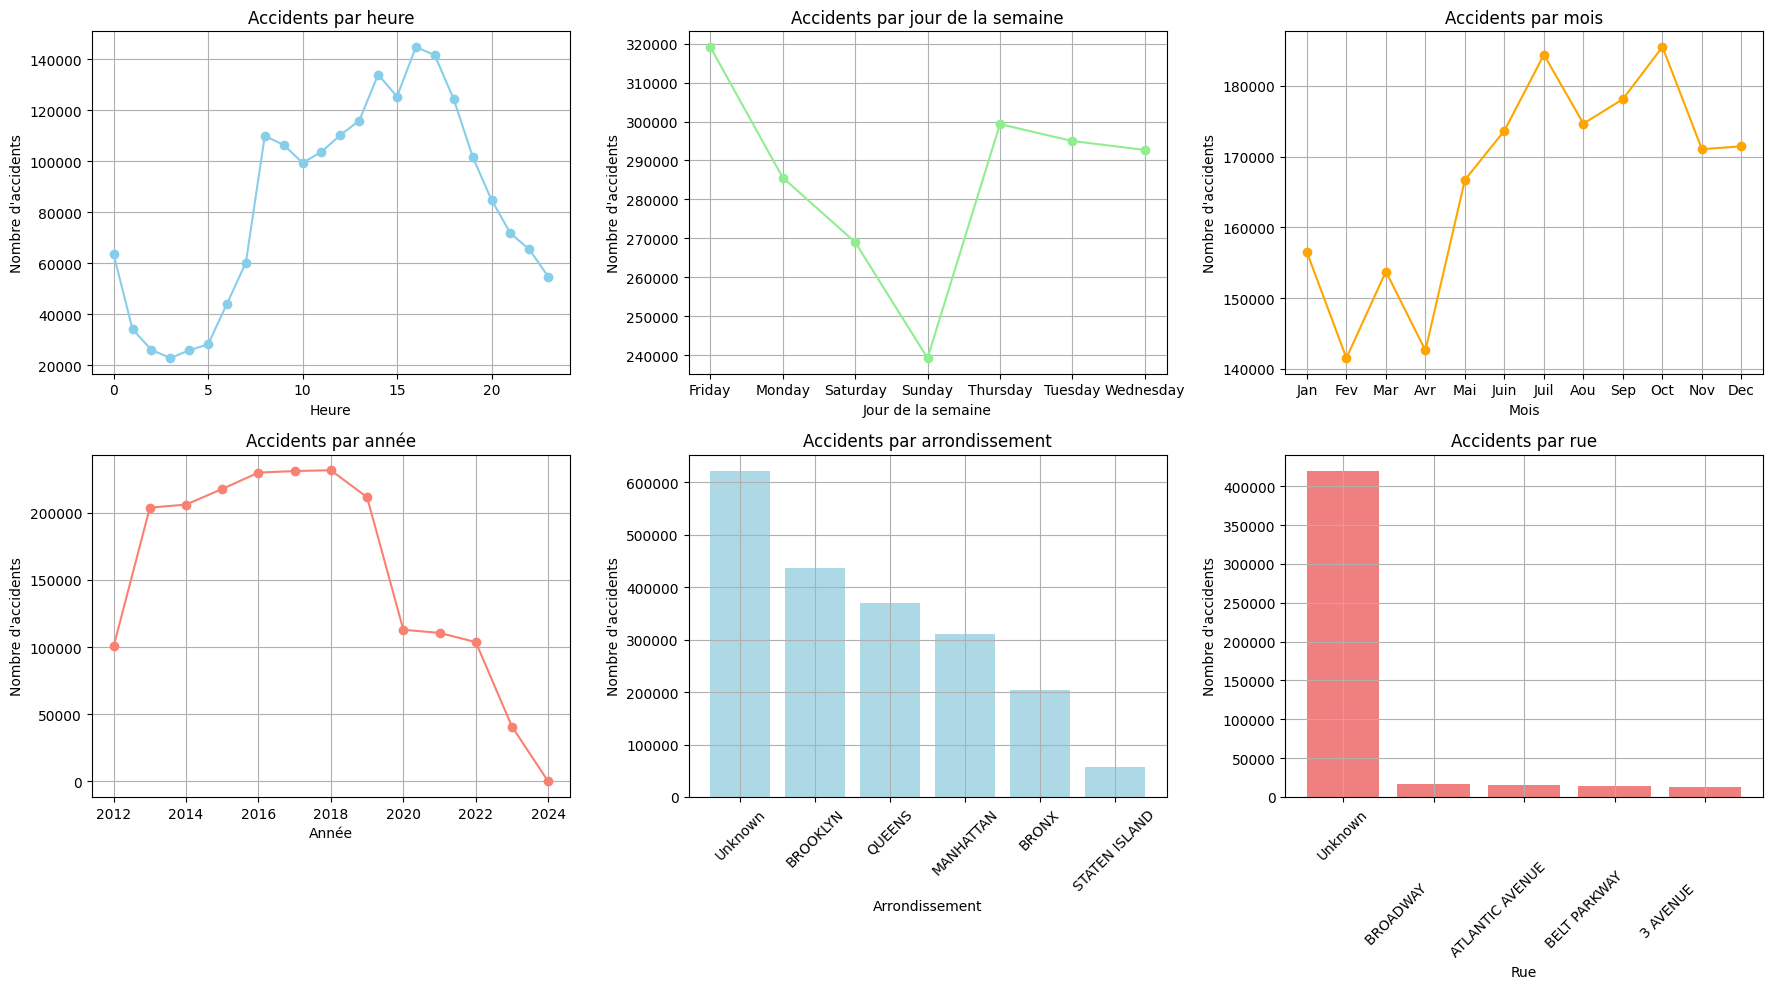

In [42]:
import calendar

# Liste des noms abrégés des mois
abrege_mois = ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec']

# Création de la grille de sous-graphiques
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Variable 'hour'
accidents_par_hour = accident_data['hour'].value_counts().sort_index()
axs[0, 0].plot(accidents_par_hour.index, accidents_par_hour.values, marker='o', color='skyblue')
axs[0, 0].set_title('Accidents par heure')
axs[0, 0].set_xlabel('Heure')
axs[0, 0].set_ylabel("Nombre d'accidents")
axs[0, 0].grid(True)

# Variable 'day_of_week'
accidents_par_day = accident_data['day_of_week'].value_counts().sort_index()
axs[0, 1].plot(accidents_par_day.index, accidents_par_day.values, marker='o', color='lightgreen')
axs[0, 1].set_title('Accidents par jour de la semaine')
axs[0, 1].set_xlabel('Jour de la semaine')
axs[0, 1].set_ylabel("Nombre d'accidents")
axs[0, 1].grid(True)

# Variable 'month'
accidents_par_month = accident_data['month'].value_counts().sort_index()
axs[0, 2].plot(abrege_mois, accidents_par_month.values, marker='o', color='orange')
axs[0, 2].set_title('Accidents par mois')
axs[0, 2].set_xlabel('Mois')
axs[0, 2].set_ylabel("Nombre d'accidents")
axs[0, 2].grid(True)

# Variable 'year'
accidents_par_year = accident_data['year'].value_counts().sort_index()
axs[1, 0].plot(accidents_par_year.index, accidents_par_year.values, marker='o', color='salmon')
axs[1, 0].set_title('Accidents par année')
axs[1, 0].set_xlabel('Année')
axs[1, 0].set_ylabel("Nombre d'accidents")
axs[1, 0].grid(True)

# Variable 'borough'
accidents_par_borough = accident_data['borough'].value_counts()
axs[1, 1].bar(accidents_par_borough.index, accidents_par_borough.values, color='lightblue')
axs[1, 1].set_title('Accidents par arrondissement')
axs[1, 1].set_xlabel('Arrondissement')
axs[1, 1].set_ylabel("Nombre d'accidents")
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Variable 'on_street_name'
accidents_par_street = accident_data['on_street_name'].value_counts().head(5)  # Prend les 5 premières rues
axs[1, 2].bar(accidents_par_street.index, accidents_par_street.values, color='lightcoral')
axs[1, 2].set_title('Accidents par rue')
axs[1, 2].set_xlabel('Rue')
axs[1, 2].set_ylabel("Nombre d'accidents")
axs[1, 2].tick_params(axis='x', rotation=45)
axs[1, 2].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

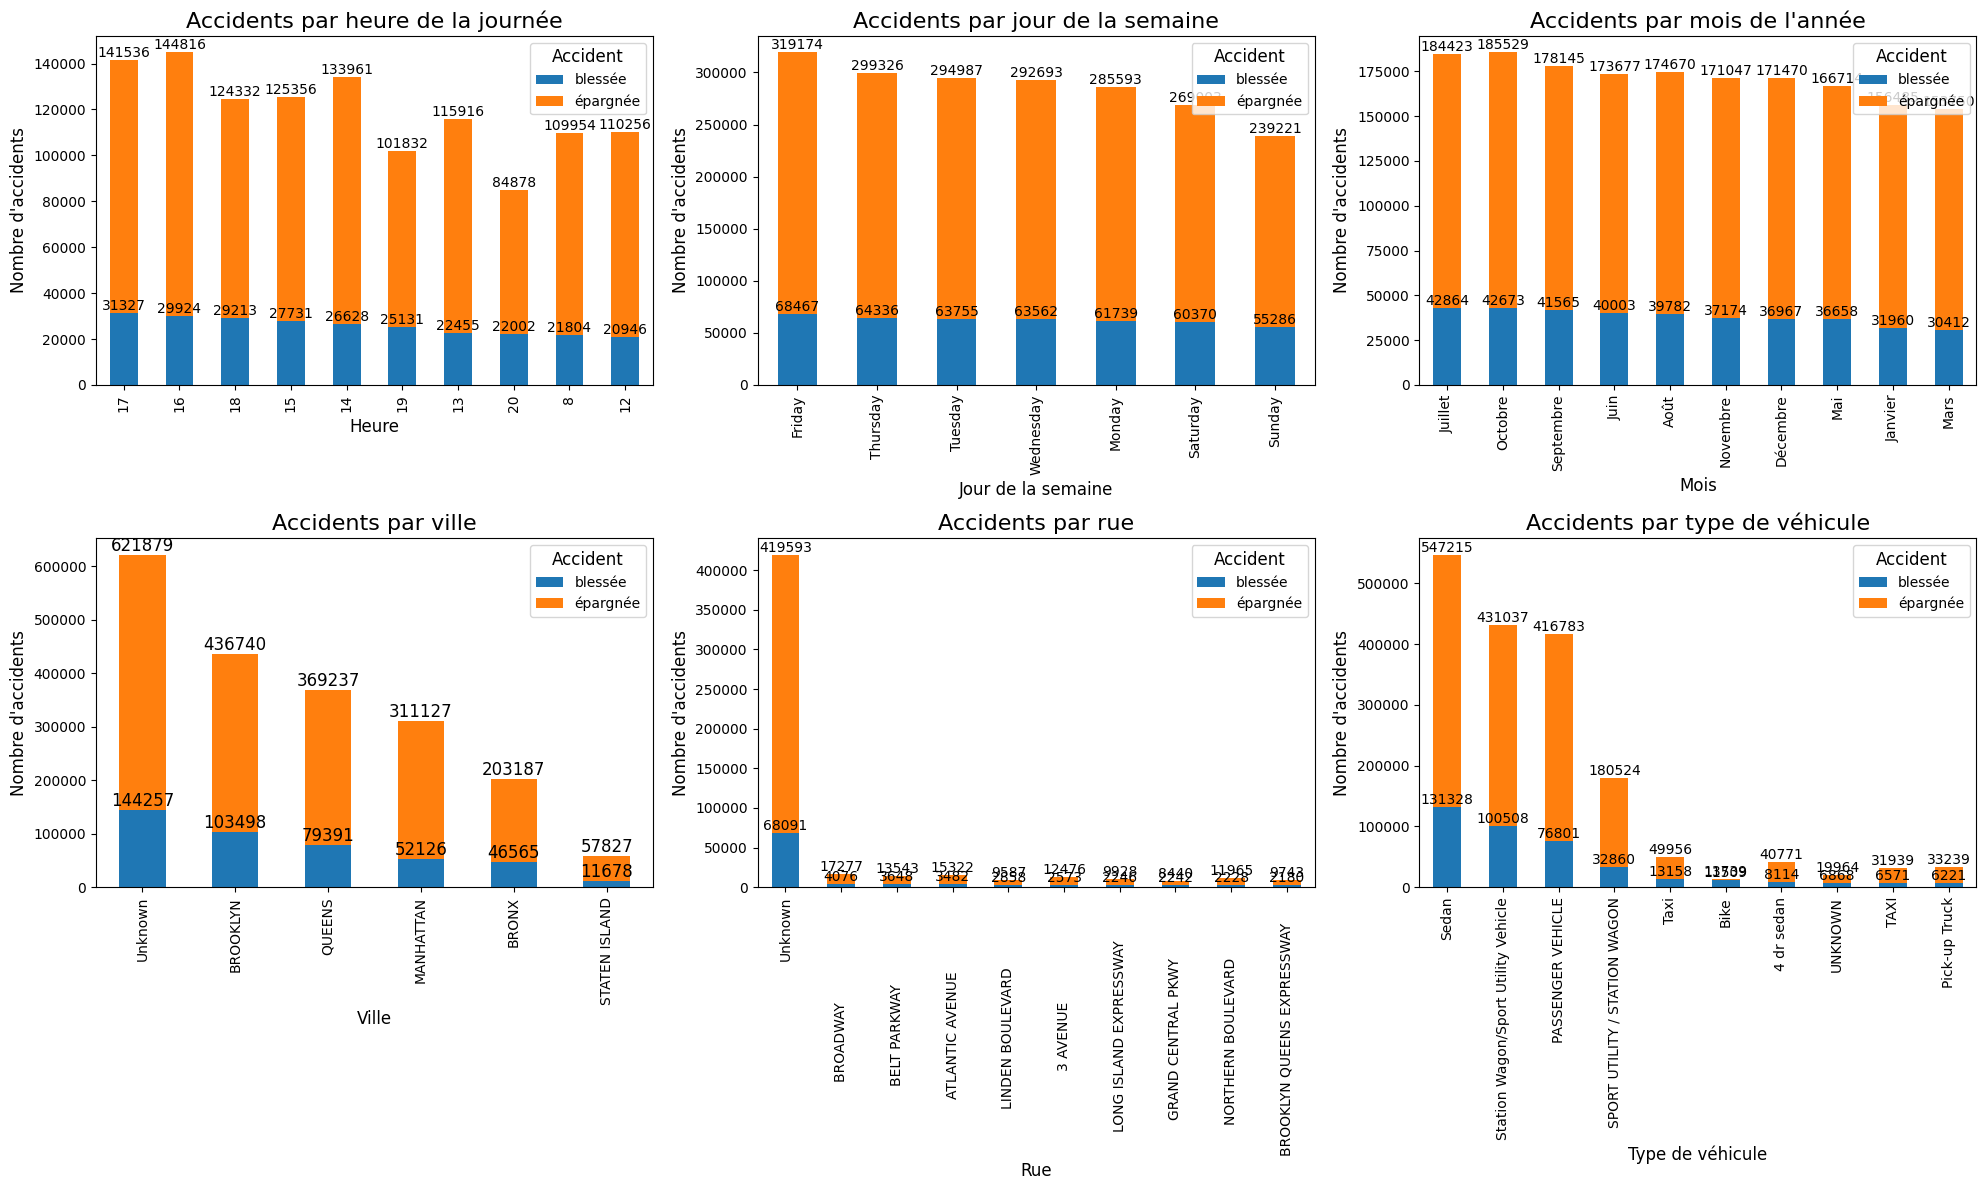

In [43]:
# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Analyse bivariée entre "Accident" et l'heure
accident_by_hour = accident_data.groupby(['hour', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_hour.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Accidents par heure de la journée', fontsize=16)
axes[0, 0].set_xlabel('Heure', fontsize=12)
axes[0, 0].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[0, 0].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivariée entre "Accident" et le jour de la semaine
accident_by_day = accident_data.groupby(['day_of_week', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_day.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Accidents par jour de la semaine', fontsize=16)
axes[0, 1].set_xlabel('Jour de la semaine', fontsize=12)
axes[0, 1].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[0, 1].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivariée entre "Accident" et le mois de l'année
month_names = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
accident_by_month = accident_data.groupby(['month', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_month.index = [month_names[i - 1] for i in accident_by_month.index]  # Convertir les indices des mois en noms de mois
accident_by_month.plot(kind='bar', stacked=True, ax=axes[0, 2])
axes[0, 2].set_title('Accidents par mois de l\'année', fontsize=16)
axes[0, 2].set_xlabel('Mois', fontsize=12)
axes[0, 2].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[0, 2].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[0, 2].containers:
    axes[0, 2].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivariée entre "Accident" et la ville
accident_by_borough = accident_data.groupby(['borough', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_borough.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Accidents par ville', fontsize=16)
axes[1, 0].set_xlabel('Ville', fontsize=12)
axes[1, 0].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[1, 0].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, label_type='edge', fontsize=12)

# Analyse bivariée entre "Accident" et la rue
accident_by_street = accident_data.groupby(['on_street_name', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_street.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Accidents par rue', fontsize=16)
axes[1, 1].set_xlabel('Rue', fontsize=12)
axes[1, 1].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[1, 1].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivariée entre "Accident" et le type de véhicule
accident_by_vehicle = accident_data.groupby(['vehicle_type_code1', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_vehicle.plot(kind='bar', stacked=True, ax=axes[1, 2])
axes[1, 2].set_title('Accidents par type de véhicule', fontsize=16)
axes[1, 2].set_xlabel('Type de véhicule', fontsize=12)
axes[1, 2].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[1, 2].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[1, 2].containers:
    axes[1, 2].bar_label(container, label_type='edge', fontsize=10)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

##   **IV** **<span style='color:blue;'> ANALYSE MULTIVARIEE </span>** 

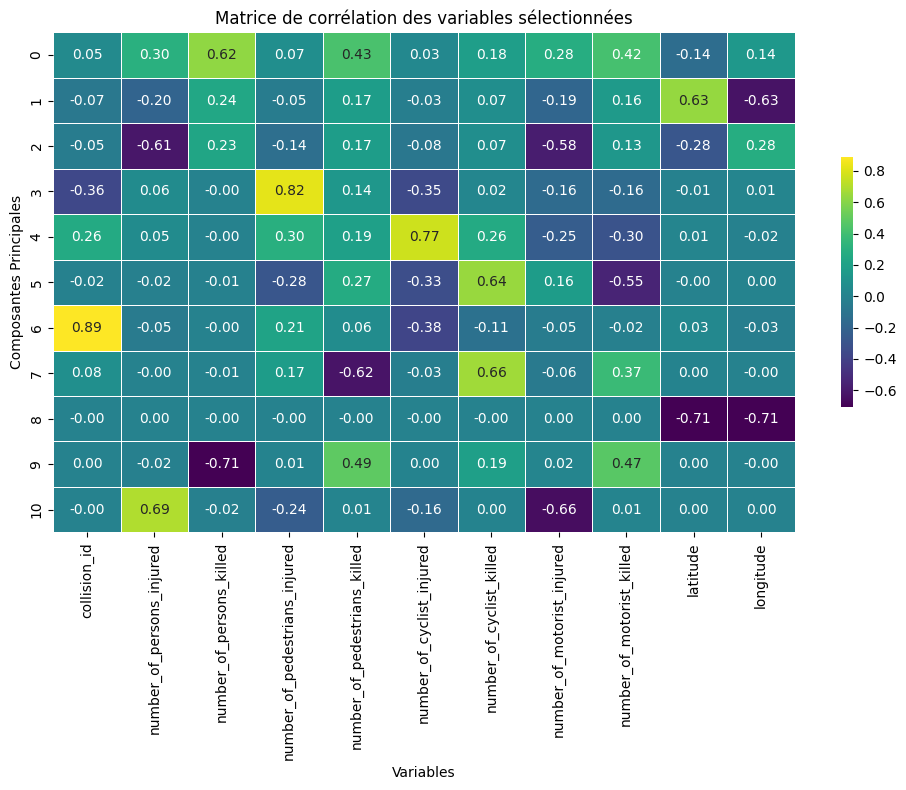

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Sélectionner uniquement les colonnes numériques dans le DataFrame
numeric_columns = accident_data.select_dtypes(include=['float64', 'int64'])

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Effectuer l'Analyse en Composantes Principales (ACP)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Visualiser la corrélation entre les variables sélectionnées
correlation_matrix = pd.DataFrame(pca.components_, columns=numeric_columns.columns)

# Définir une taille de figure 
plt.figure(figsize=(10, 8))

# Créer la carte de chaleur avec des annotations, une palette de couleurs et un formatage appropriés
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Ajouter un titre à la carte de chaleur
plt.title('Matrice de corrélation')

# Ajouter des labels aux axes x et y
plt.xlabel('Variables')
plt.ylabel('Composantes Principales')

# Afficher la barre de couleur pour indiquer les valeurs de corrélation
colorbar = heatmap.collections[0].colorbar

# Ajuster la disposition pour éviter que les annotations ne soient tronquées
plt.tight_layout()

# Afficher la carte de chaleur
plt.show()


**Composante Principale 1** :
Cette composante principale est fortement associée aux caractéristiques liées au nombre de victimes mortelles dans les accidents de la circulation. Les variables les plus significatives sont le nombre de personnes tuées, le nombre de piétons tués et le nombre de conducteurs tués. Cela suggère que cette composante capture la gravité des accidents entraînant des pertes de vies humaines.

**Composante Principale 2** :
Cette composante principale est principalement définie par les coordonnées géographiques, la latitude et la longitude. Les poids élevés de ces deux variables indiquent que cette composante représente la localisation spatiale des accidents. Une valeur positive de latitude et une valeur négative de longitude peuvent correspondre à une localisation spécifique, et vice versa.

**Composante Principale 3** :
Cette composante principale est liée aux caractéristiques des accidents entraînant des blessures, en particulier le nombre de personnes blessées et le nombre de conducteurs blessés. Les poids élevés de ces deux variables suggèrent que cette composante capture des informations sur les accidents moins graves impliquant des blessures.

**Composante Principale 4** :
Cette composante principale est fortement associée au nombre de piétons blessés dans les accidents. Le poids élevé de la variable "number_of_pedestrians_injured" indique que cette composante capture des informations spécifiques sur les accidents impliquant des piétons blessés.

**Composante Principale 5** :
Cette composante principale est principalement définie par le nombre de cyclistes blessés dans les accidents. Cela suggère que cette composante capture des informations sur les accidents impliquant des cyclistes blessés, ce qui pourrait être utile pour les analyses de sécurité routière concernant les cyclistes.

**Composante Principale 6** :
Cette composante principale est associée au nombre de victimes cyclistes tuées et blessées, ainsi qu'au nombre de conducteurs tués. Les poids élevés de ces variables suggèrent que cette composante représente des informations sur les accidents impliquant des cyclistes, à la fois mortels et non mortels.

##   **V** **<span style='color:blue;'> LA MODELISATION </span>** 

## Distribution de la variable accident

C:\Users\pc\AppData\Local\Temp\ipykernel_5088\1273661475.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  barplot.text(i, accident_counts[i] + 10000, f'{value:.2%}', ha='center')


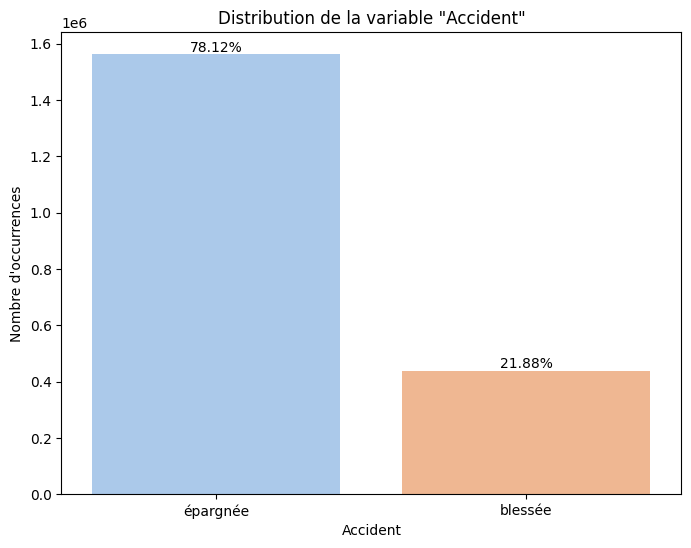

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les occurrences de chaque classe dans la variable 'Accident'
accident_counts = accident_data['Accident'].value_counts()

# Calculer les proportions de chaque classe
total_samples = len(accident_data)
proportions = accident_counts / total_samples

# Tracer un graphique à barres pour visualiser la distribution avec les proportions
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=['épargnée', 'blessée'], y=accident_counts.values, palette="pastel", hue=['épargnée', 'blessée'], dodge=False)

# Annoter chaque barre avec sa proportion
for i, value in enumerate(proportions):
    barplot.text(i, accident_counts[i] + 10000, f'{value:.2%}', ha='center')

plt.title('Distribution de la variable "Accident"')
plt.xlabel('Accident')
plt.ylabel('Nombre d\'occurrences')
plt.show()

## Reequilibrons notre variable d'interet avec la methode smote

## Séparez les caractéristiques (X) de la variable cible (y) :

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [200]:
from sklearn.preprocessing import LabelEncoder
# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Convertir les étiquettes 'épargnée' et 'blessée' en 0 et 1
accident_data['Accident'] = label_encoder.fit_transform(accident_data['Accident'])


## Séparation des données

In [201]:
from sklearn.model_selection import train_test_split

X = accident_data.drop(columns=['Accident'])
y = accident_data['Accident']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
# Définition des colonnes catégorielles et numériques
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Création des transformateurs pour les colonnes catégorielles et numériques
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Application des transformations aux colonnes catégorielles et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Création du pipeline avec le préprocesseur et le modèle de régression logistique
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Évaluation du modèle sur l'ensemble de test
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7816875


In [203]:
# Initialisez le modèle 
model = LogisticRegression()

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression


# Séparation des données en variables explicatives (X) et la variable cible (y)
X = accident_data.drop(columns=['Accident'])
y = accident_data['Accident']

# Encodage ordinal des variables catégorielles
ordinal_encoder = OrdinalEncoder()
X_encoded = ordinal_encoder.fit_transform(X.select_dtypes(include=['object']))

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [205]:
from sklearn.metrics import classification_report
# Initialisation du modèle
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     87325
           1       0.78      1.00      0.88    312675

    accuracy                           0.78    400000
   macro avg       0.39      0.50      0.44    400000
weighted avg       0.61      0.78      0.69    400000



c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Créez un pipeline complet avec le modèle logistique

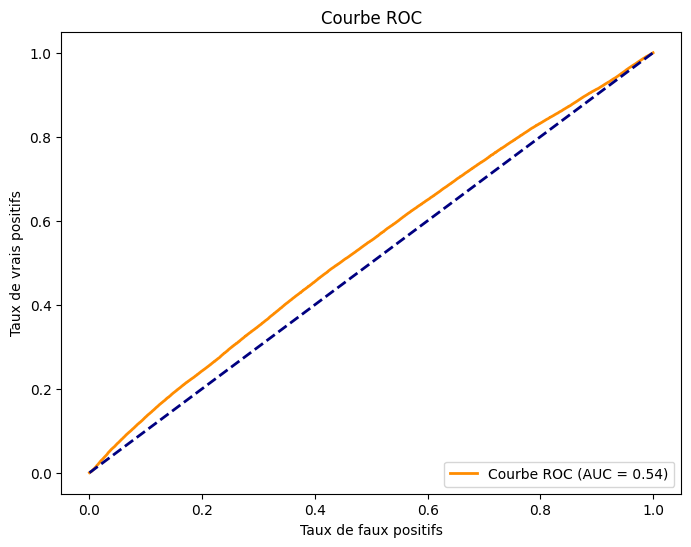

In [206]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtenir les probabilités prédites du modèle sur les données de test
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calculer le taux de faux positifs, le taux de vrais positifs et les seuils à partir des probabilités prédites
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()



Pour prédire si une personne est blessée ou épargnée dans un accident de la circulation, notre modèle de classification binaire a été évalué. Voici une interprétation des résultats en fonction de cette tâche :

Precision : La précision mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives faites par le modèle. Dans ce contexte, la précision pour la classe des personnes épargnées (classe 0) est de 0.00. Cela signifie que le modèle n'a pas correctement identifié les personnes épargnées parmi toutes les prédictions positives de personnes épargnées. Pour la classe des personnes blessées (classe 1), la précision est de 0.78, indiquant que 78% des prédictions positives de personnes blessées étaient correctes.

Recall : Le rappel (recall) mesure la proportion de personnes réellement épargnées (ou blessées) correctement identifiées parmi toutes les personnes réellement épargnées (ou blessées). Dans ce cas, le rappel pour les personnes épargnées (classe 0) est de 0.00, indiquant que le modèle n'a pas correctement identifié les personnes épargnées parmi toutes les personnes réellement épargnées. Pour les personnes blessées (classe 1), le rappel est de 1.00, ce qui signifie que toutes les personnes réellement blessées ont été correctement identifiées par le modèle.

F1-score : Le F1-score est une mesure harmonique de la précision et du rappel. Il est utile lorsque les classes sont déséquilibrées, comme c'est le cas ici. Le F1-score pour les personnes épargnées (classe 0) est de 0.00, ce qui indique une mauvaise performance du modèle dans la prédiction de cette classe. Pour les personnes blessées (classe 1), le F1-score est de 0.88, indiquant une bonne précision et un bon rappel pour cette classe.

Accuracy : L'accuracy mesure la proportion de prédictions correctes parmi toutes les prédictions faites par le modèle. Dans ce cas, l'accuracy est de 0.78, ce qui signifie que le modèle a correctement prédit 78% de toutes les personnes, épargnées ou blessées.

En résumé, le modèle semble avoir une bonne performance dans la prédiction des personnes blessées, avec une précision et un rappel élevés pour cette classe. Cependant, le modèle a du mal à prédire correctement les personnes épargnées, ce qui se reflète dans une précision et un rappel de 0.00 pour cette classe. Il est important de comprendre les raisons sous-jacentes à cette mauvaise performance pour les personnes épargnées afin d'améliorer la capacité prédictive du modèle dans cette tâche.

****

#   **VI**            **<span style='color:blue;'> CONCLUSION </span>**     

<div style="border: 10px solid green;padding:12px;font-size: 18px;">Après une analyse approfondie des données sur les accidents de la route, on peut deduire que les comportements négligents des conducteurs, tels que l'inattention/distraction, le non-respect des priorités et le suivi trop serré, sont des facteurs prédominants dans les accidents. Par exemple, l'inattention au volant peut inclure l'utilisation du téléphone portable pendant la conduite, comme observé dans de nombreux cas d'accidents causés par des conducteurs distraits.
Tendances temporelles et spatiales :
Certains jours de la semaine et heures de la journée présentent des taux d'accidents plus élevés. Par exemple, les données révèlent une augmentation significative des accidents les vendredis après-midi, ce qui pourrait être lié à une combinaison de fatigue accrue, de circulation intense et de comportements imprudents avant le week-end.
Impact des interventions basées sur les données : En analysant les données, il est observé qu'entre 7 heures et 9 heures du matin, ainsi qu'entre 16 heures et 18 heures les vendredis, les usagers de la route traversant les rues de Brooklyn ou de Queens présentent un risque significativement accru d'accident ou de collision avec des conducteurs inattentifs ou distraits et ceci surtout en été.</div>

 ***

<span style="font-size: 250px;">🙏</span> <span style="font-size: 250px;">🙏</span><span style="font-size: 250px;">🙏</span> <span style="font-size: 250px;">🙏</span>
